In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('.')

import numpy as np
import torch
from torch import nn

from src.data.ShapeManager import Data
from src.data.SkeletonFrame import SkeletonFrame
from scripts.train_seq2seq import *
from src.data.Animation import Animation
import matplotlib.animation as anim

import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
rc('animation', html='html5')

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data = np.load('./data/test16.npy')
sequences = np.loadtxt('./data/TestSequences.txt')

input_data = Data(data, np.load('./data/input_norm.npy'), "input", sequences)
output_data = Data(data, np.load('./data/output_norm.npy'), "output", sequences)

class Seq2Seq:
    def __init__(self):
        self.MAX_LENGTH = 100
        self.input_size = 575
        self.encoder = torch.load('models/seq2seq/1/encoder.pt')
        self.decoder = torch.load('models/seq2seq/1/decoder.pt')

    def encode(self, input_tensor):
        encoder_hidden = self.encoder.initHidden()
        input_length = input_tensor.size(0)
        encoder_outputs = torch.zeros(MAX_LENGTH, self.encoder.hidden_size).cuda()

        for ei in range(input_length):
            encoder_output, encoder_hidden = self.encoder(input_tensor[ei], encoder_hidden)
            encoder_outputs[ei] = encoder_output[0, 0]
        return encoder_outputs, encoder_hidden

    def decode(self, decoder_input, decoder_hidden, encoder_outputs):
        decoder_outputs = torch.zeros(self.MAX_LENGTH, self.input_size).cuda()

        for di in range(MAX_LENGTH):
            decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden)
            decoder_input = decoder_output.squeeze().detach()
            decoder_outputs[di] = decoder_output

        return decoder_outputs
    
    def predict(self, input_data):
        input_tensor = torch.from_numpy(input_data.astype(np.float32)).cuda()
        encoder_outputs, encoder_hidden = self.encode(input_tensor)        
        prediction_data = self.decode(input_tensor[-1], encoder_hidden, encoder_outputs)
        return prediction_data.cpu().detach().numpy()

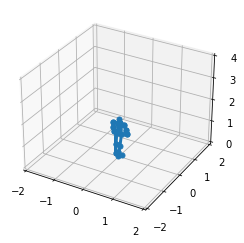

In [24]:
input_numpy = input_data(0).normed()[...,:575]

seq = Seq2Seq()
prediction_normed = seq.predict(input_numpy[:100])

prediction = Data(np.zeros(575), np.load('./data/input_norm.npy')[:,:575], "input", sequences)
prediction.set_normed(input_numpy[:100])

# prediction = Data(input_numpy[:100, :575], np.load('./data/input_norm.npy')[:,:575], "input", sequences)
# prediction.set_normed(prediction_normed)

frame = SkeletonFrame(prediction[50])
frames = [SkeletonFrame(x) for x in prediction]

def update_fig(frame_idx):
    frames[frame_idx].update_character(graph)
    return [graph]

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlim3d(-2,2)
ax.set_ylim3d(-2,2)
ax.set_zlim3d(0,4)

graph = frame.draw_character(ax)
out = anim.FuncAnimation(fig, update_fig, len(frames), interval = 1000 / 120., blit=True)

In [25]:
out

In [8]:
np.max(prediction.bone_position - prediction.bone_position[0])

0.12852046453595167

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data = np.load('./data/test16.npy')
sequences = np.loadtxt('./data/TestSequences.txt')
norm = np.load('./data/input_norm.npy')

input_data = Data(data, np.load('./data/input_norm.npy'), "input", sequences)
output_data = Data(data, np.load('./data/output_norm.npy'), "output", sequences)

MAX_LENGTH = 100
input_size = 575
encoder = torch.load('models/seq2seq/1/encoder.pt')
decoder = torch.load('models/seq2seq/1/decoder.pt')

def encode(self, input_tensor):
    encoder_hidden = encoder.initHidden()
    input_length = input_tensor.size(0)
    encoder_outputs = torch.zeros(MAX_LENGTH, encoder.hidden_size).cuda()

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]
    return encoder_outputs, encoder_hidden

def decode(self, decoder_input, decoder_hidden, encoder_outputs):
    decoder_outputs = torch.zeros(MAX_LENGTH, input_size).cuda()

    for di in range(MAX_LENGTH):
        decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
        decoder_input = decoder_output.squeeze().detach()
        decoder_outputs[di] = decoder_output

    return decoder_outputs


In [27]:
input_tensor = torch.from_numpy(input_data.data[:100,:575].astype(np.float32)).cuda()

In [ ]:
encoder_outputs, encoder_hidden = encode(input_tensor)        
prediction_data = decode(input_tensor[-1], encoder_hidden, encoder_outputs)

In [29]:
normalize(input_tensor, inp)

<function src.utils.functions.normalize(X, mean, std)>

In [31]:
input_data.normed

<bound method DataBase.normed of <src.data.ShapeManager.DataBase object at 0x7f44bf369850>>